In [1]:

%pip install gradio

import gradio as gr
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Load dataset
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target

Note: you may need to restart the kernel to use updated packages.


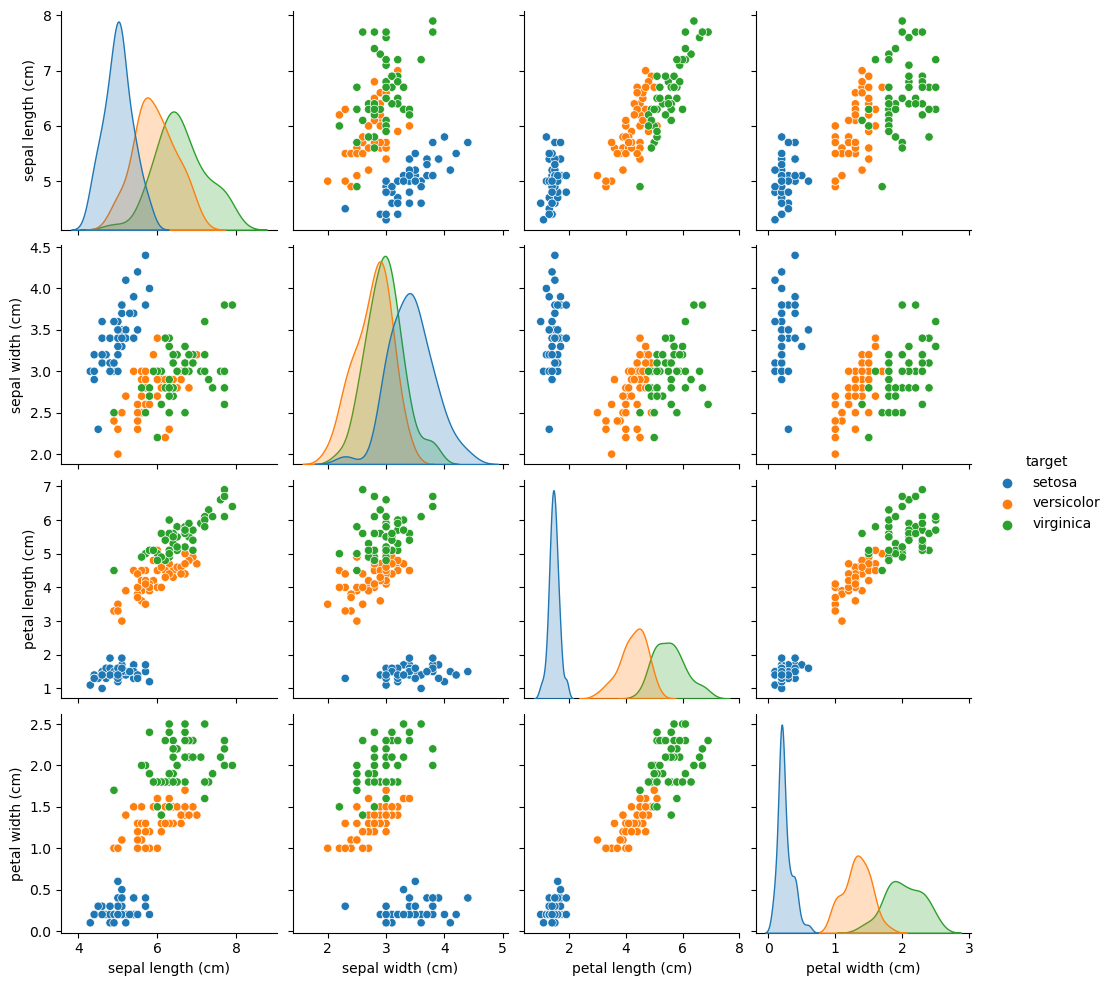

In [2]:
import seaborn as sns

# Rename classes using the iris target names
iris.frame["target"] = iris.target_names[iris.target]
_ = sns.pairplot(iris.frame, hue="target")

In [3]:
# Train model with cross-validation
model = RandomForestClassifier(random_state=42)
cross_val_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validation accuracy: {np.mean(cross_val_scores):.4f}")

# Train on the full dataset
model.fit(X, y)
train_accuracy = model.score(X, y)
print(f"Training accuracy: {train_accuracy:.4f}")

Cross-validation accuracy: 0.9667


RandomForestClassifier(random_state=42)

In [4]:

# Gradio UI for prediction
def predict(sepal_length, sepal_width, petal_length, petal_width):
    input_data = pd.DataFrame([[sepal_length, sepal_width, petal_length, petal_width]],
                              columns=iris.feature_names)
    prediction = model.predict(input_data)[0]
    return iris.target_names[prediction]

In [5]:
predict(1, 2, 3, 4)

'virginica'

In [6]:
# Create Gradio interface
demo = gr.Interface(
    fn=predict,
    inputs=[
        gr.Number(label="Sepal Length"),
        gr.Number(label="Sepal Width"),
        gr.Number(label="Petal Length"),
        gr.Number(label="Petal Width"),
    ],
    outputs="text",
    examples=[
        [5.1, 3.5, 1.4, 0.2],
        [6.2, 2.9, 4.3, 1.3],
        [7.7, 3.8, 6.7, 2.2],
    ],
    title="Iris Flower Prediction",
    description="Enter the sepal and petal measurements to predict the Iris species."
)

demo.launch()


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [7]:
import pickle

# save model to file
model_filename = "iris_random_forest_classifier.pkl"
with open(model_filename, mode="bw") as f:
    pickle.dump(model, file=f)